In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import random 

from scipy.stats import uniform, randint
from helpers.model_utils import train, predict, evaluate, random_search
from helpers.load_manager import load_dataframe
from helpers.plots import plot_losses, plot_predictions_vs_labels, plot_predictions_vs_labels_by_species, plot_boxplot_predictions_vs_labels

# from ray import tune
# from ray.tune.schedulers import ASHAScheduler

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model training

In [5]:
data_df = load_dataframe()

In [6]:
data_df

,Species ID,upstream200,Stress,Stress_name
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",7.350767,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",7.523925,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",7.686150,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",9.060965,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",8.757449,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
...,...,...,...,...
96410,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1,...",5.834830,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
96410,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1,...",5.711445,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
96410,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1,...",5.170262,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
96410,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1,...",5.717680,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# Try a Config

In [18]:
config = {
    'lr': 0.001,
    'batch_size': 1024,
    'epochs': 10,
    'species_id': -1,
    'test_size': 20000,
    'hidden_size': 60,
    'cnn_filters': 100,
    'model_version': 1,
    'data_df': data_df
}

net, train_losses, val_losses, test_dataset = train(config)

Started training CNNV2
Training on 25019 samples, testing on 2780 samples
Epoch 0, train loss: 17.800896072387694 validation loss: 20.812587356567384
Validation loss decreased (inf --> 20.812587).  Saving model ...
Epoch 1, train loss: 11.62630558013916 validation loss: 12.342007255554199
Validation loss decreased (20.812587 --> 12.342007).  Saving model ...
Epoch 2, train loss: 8.000861883163452 validation loss: 5.959799766540527
Validation loss decreased (12.342007 --> 5.959800).  Saving model ...
Epoch 3, train loss: 5.9794426441192625 validation loss: 3.9885634899139406
Validation loss decreased (5.959800 --> 3.988563).  Saving model ...
Epoch 4, train loss: 5.047035789489746 validation loss: 3.225953483581543
Validation loss decreased (3.988563 --> 3.225953).  Saving model ...
Epoch 5, train loss: 4.541845715045929 validation loss: 2.822120761871338
Validation loss decreased (3.225953 --> 2.822121).  Saving model ...
Epoch 6, train loss: 4.318787968158722 validation loss: 2.720875

# Param tuning

In [85]:
param_dist = {
        'lr': uniform(1e-5, 1e-2),
        'cnn_filters': randint(50, 150),
        'batch_size': randint(512, 2048),
        'hidden_size': randint(30, 100),
        'activation': [nn.ReLU(), nn.LeakyReLU(), nn.Tanh()]
    }

best_config = random_search(data_df, species_id=-1, test_size=20000, param_dist=param_dist, n_iter=10)


Started training CNNV2
Training on 25019 samples, testing on 2780 samples
Epoch 0, train loss: 10.261330025536674 validation loss: 9.769811868667603
Validation loss decreased (inf --> 9.769812).  Saving model ...
Epoch 1, train loss: 4.632132802690778 validation loss: 5.269809722900391
Validation loss decreased (9.769812 --> 5.269810).  Saving model ...
Epoch 2, train loss: 4.167451909610203 validation loss: 3.8278567790985107
Validation loss decreased (5.269810 --> 3.827857).  Saving model ...
Epoch 3, train loss: 3.8928704602377757 validation loss: 2.9268069863319397
Validation loss decreased (3.827857 --> 2.926807).  Saving model ...
Epoch 4, train loss: 3.6381577593939647 validation loss: 2.8232056498527527
Validation loss decreased (2.926807 --> 2.823206).  Saving model ...
Epoch 5, train loss: 3.55764571258 validation loss: 2.8167391419410706
Validation loss decreased (2.823206 --> 2.816739).  Saving model ...
Epoch 6, train loss: 3.4614205360412598 validation loss: 2.81048458814

In [ ]:
best_config

# Try best config

In [86]:
config = best_config
net, train_losses, val_losses, test_dataset = train(config)



Started training CNNV2
Training on 25019 samples, testing on 2780 samples
Epoch 0, train loss: 6.687978686957524 validation loss: 4.216126769781113
Validation loss decreased (inf --> 4.216127).  Saving model ...
Epoch 1, train loss: 3.9762696973208724 validation loss: 2.6695889234542847
Validation loss decreased (4.216127 --> 2.669589).  Saving model ...
Epoch 2, train loss: 3.628510540929334 validation loss: 2.6305543184280396
Validation loss decreased (2.669589 --> 2.630554).  Saving model ...
Epoch 3, train loss: 3.4395850773515373 validation loss: 2.6566420197486877
EarlyStopping counter: 1 out of 7
Epoch 4, train loss: 3.3191772904889336 validation loss: 2.661148101091385
EarlyStopping counter: 2 out of 7
Epoch 5, train loss: 3.240558385848999 validation loss: 2.781405031681061
EarlyStopping counter: 3 out of 7
Epoch 6, train loss: 3.1827406307746626 validation loss: 2.6533398628234863
EarlyStopping counter: 4 out of 7
Epoch 7, train loss: 3.09838997906652 validation loss: 2.70675

# Test

In [94]:
# Test configuration
config = {
    'batch_size': 1024,
}

# Run predictions
predictions, labels, species_ids, all_stress_ids = predict(config, net, test_dataset)

# Evaluate regression metrics
mse, mae, r2 = evaluate(predictions, labels)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.608391523361206
Mean Absolute Error: 1.2677220106124878
R-squared: 0.1656882554108623


# Plots

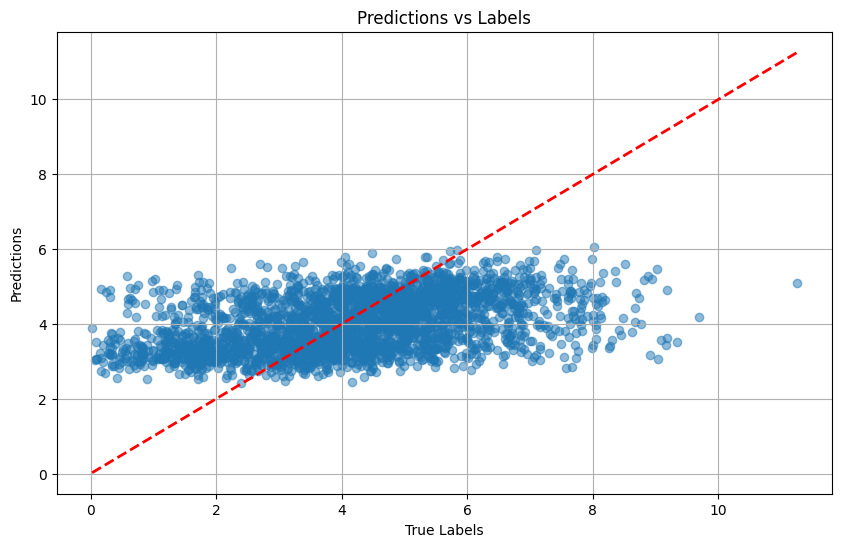

In [95]:
plot_predictions_vs_labels(predictions, labels)


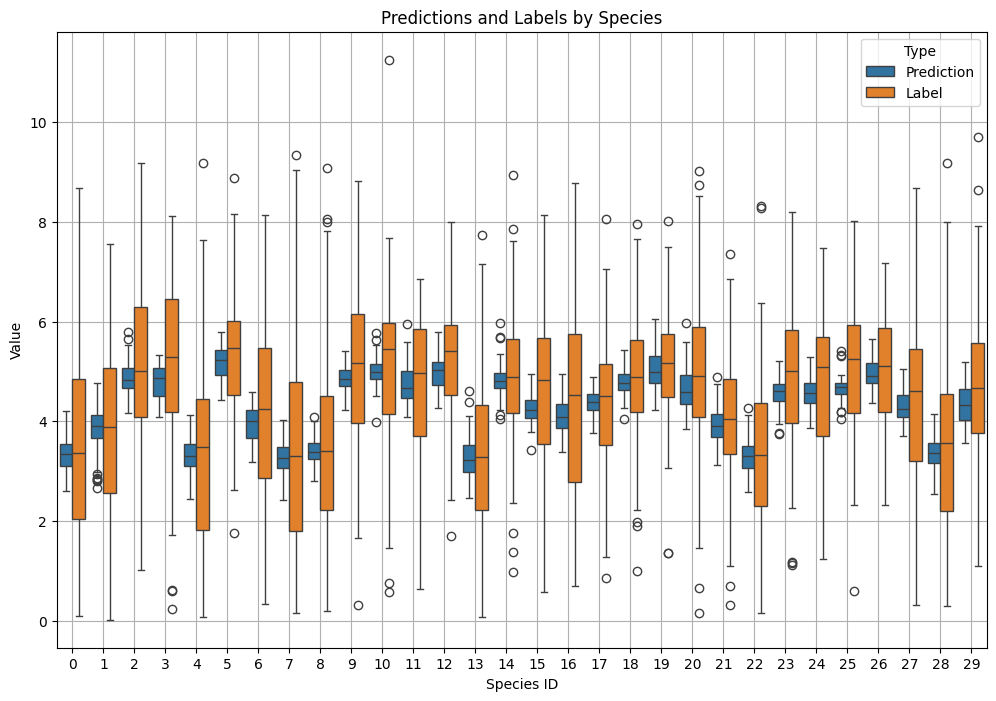

In [89]:
plot_boxplot_predictions_vs_labels(predictions, labels, species_ids, by_label='Species')

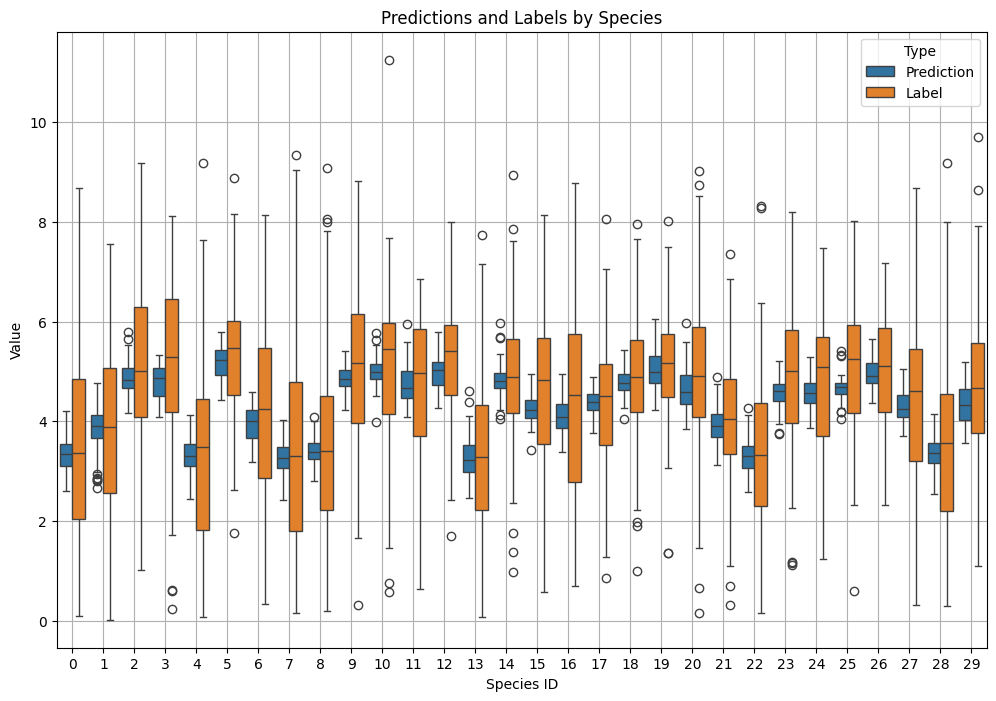

In [90]:
# Plot the boxplot
plot_boxplot_predictions_vs_labels(predictions, labels, species_ids, by_label='Species')

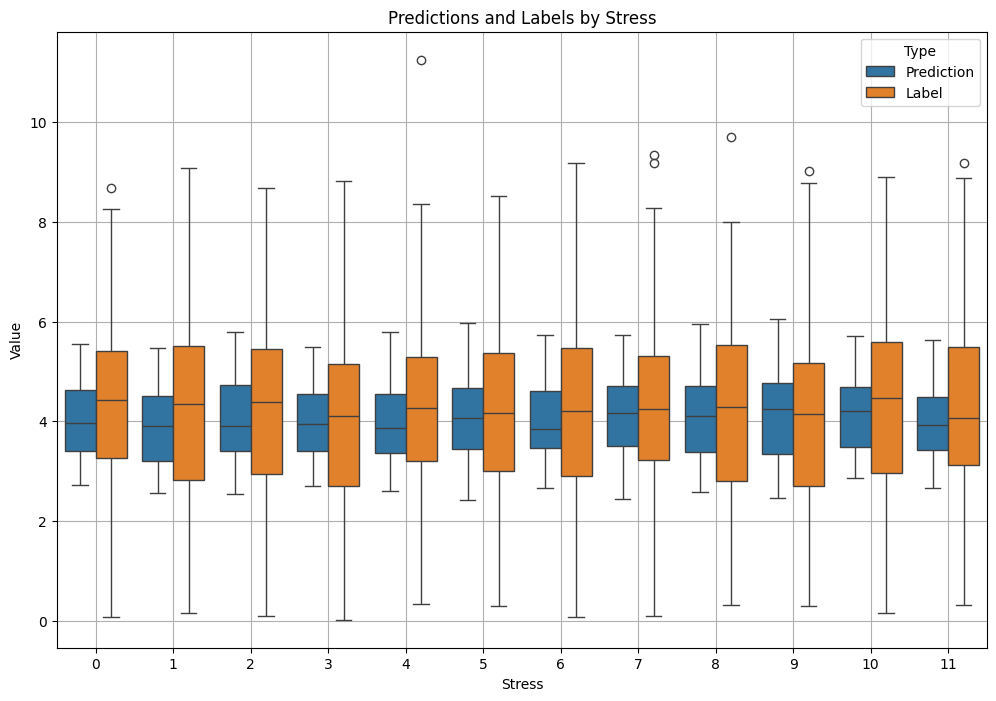

In [97]:
# Plot the boxplot
plot_boxplot_predictions_vs_labels(predictions, labels, all_stress_ids, by_label='Stress')

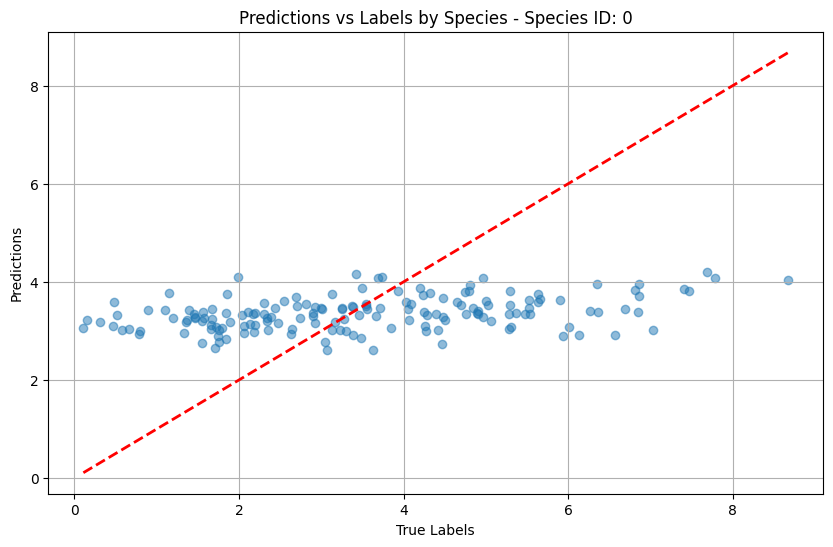

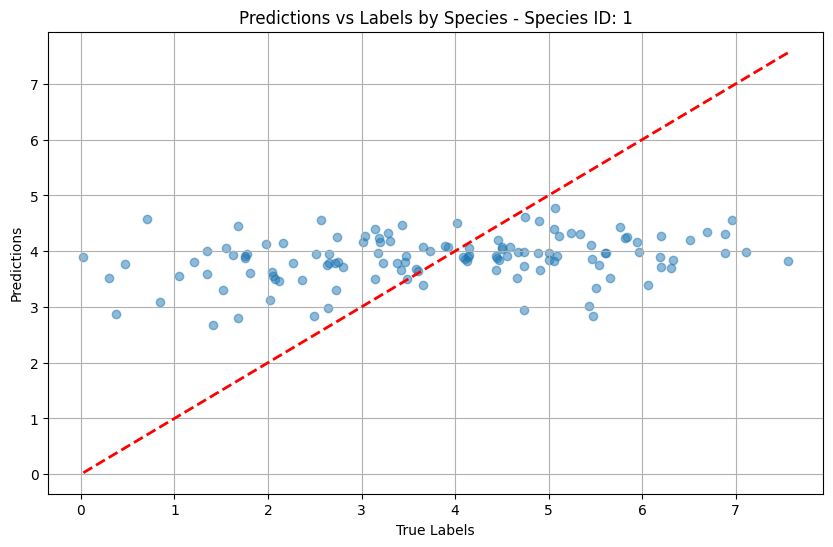

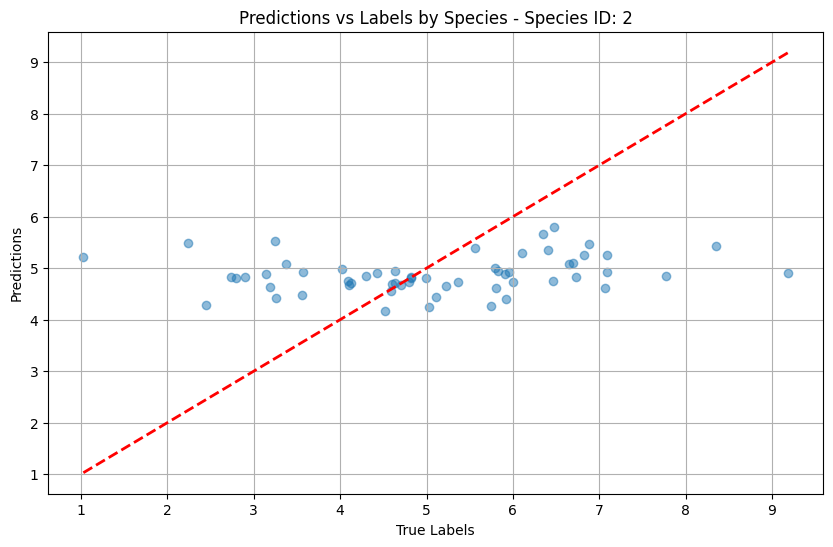

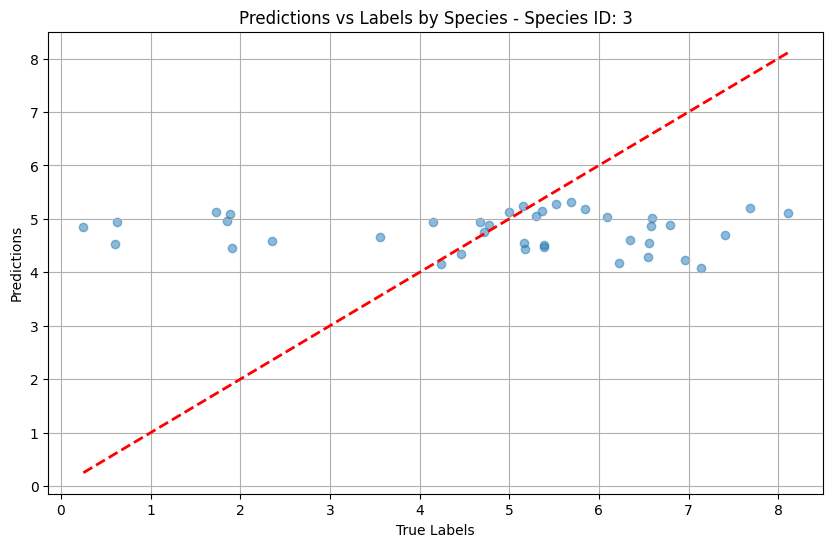

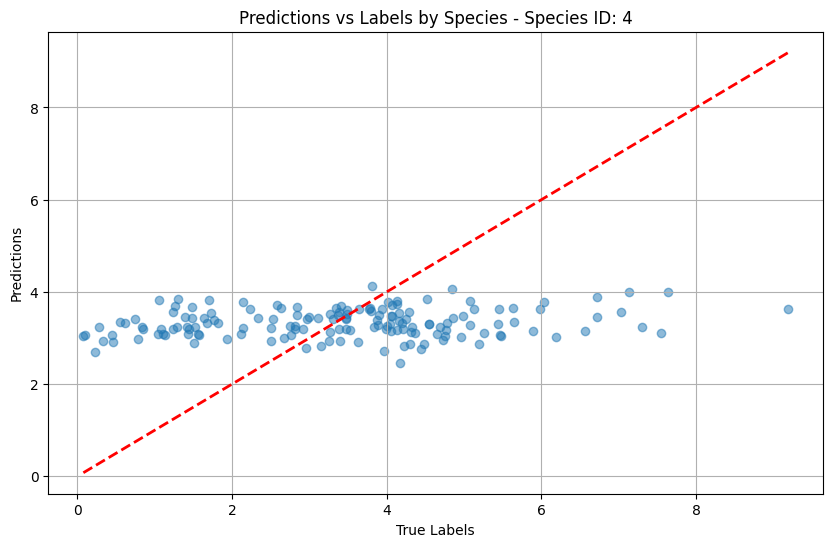

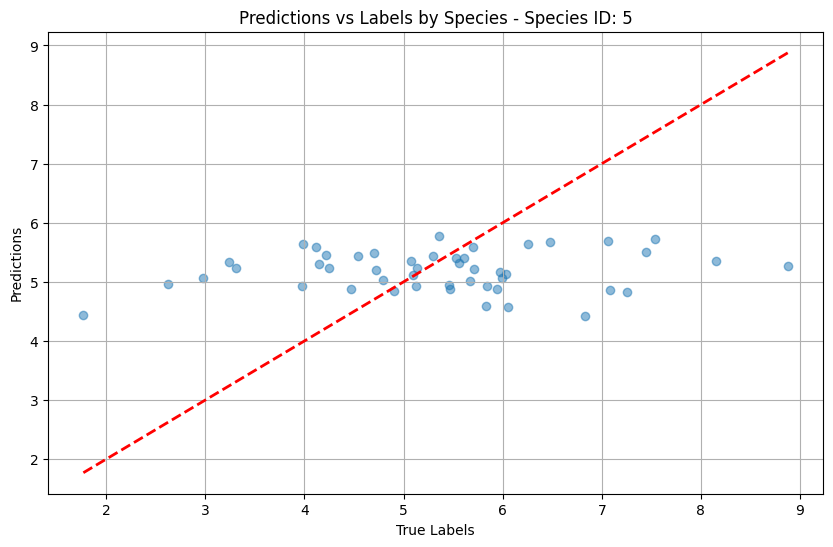

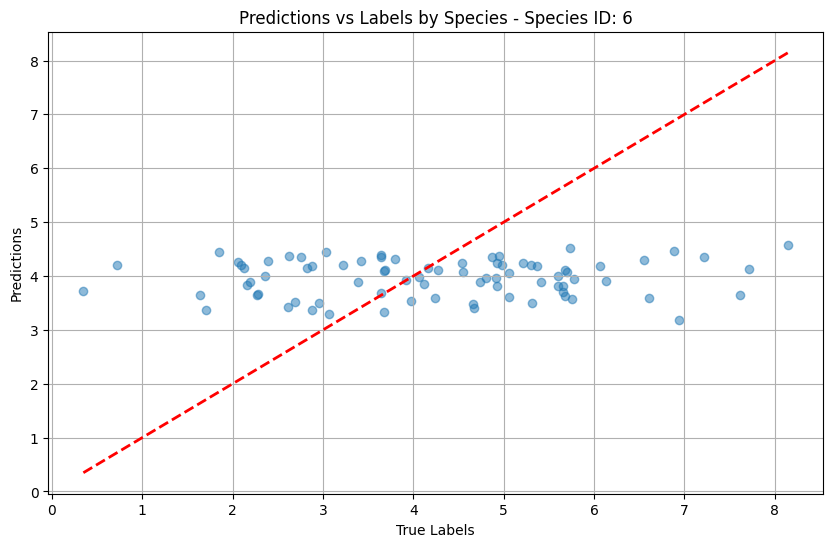

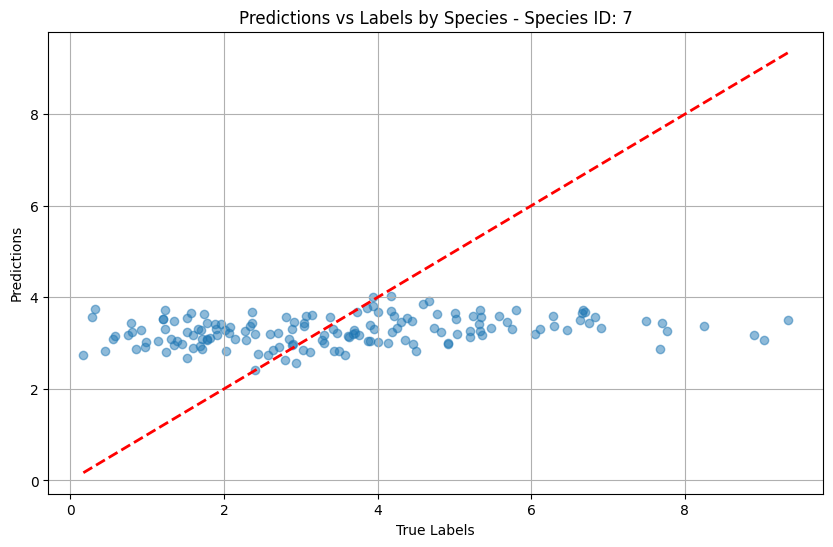

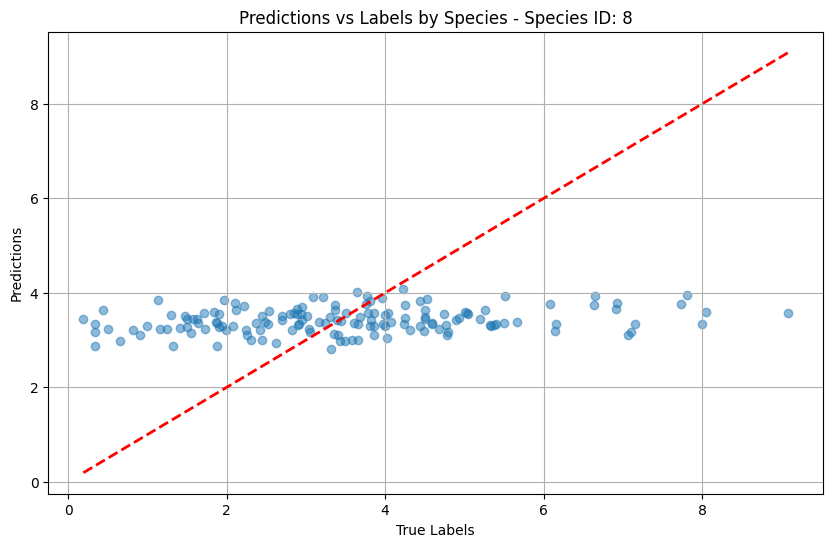

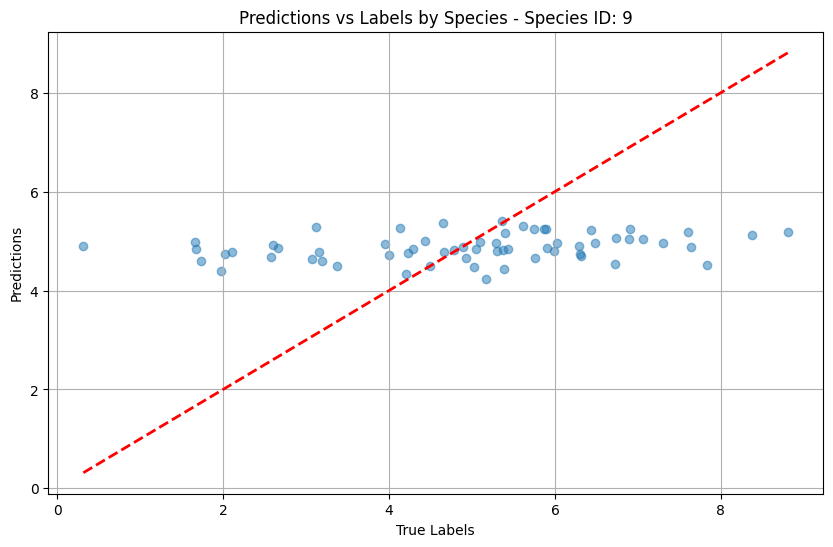

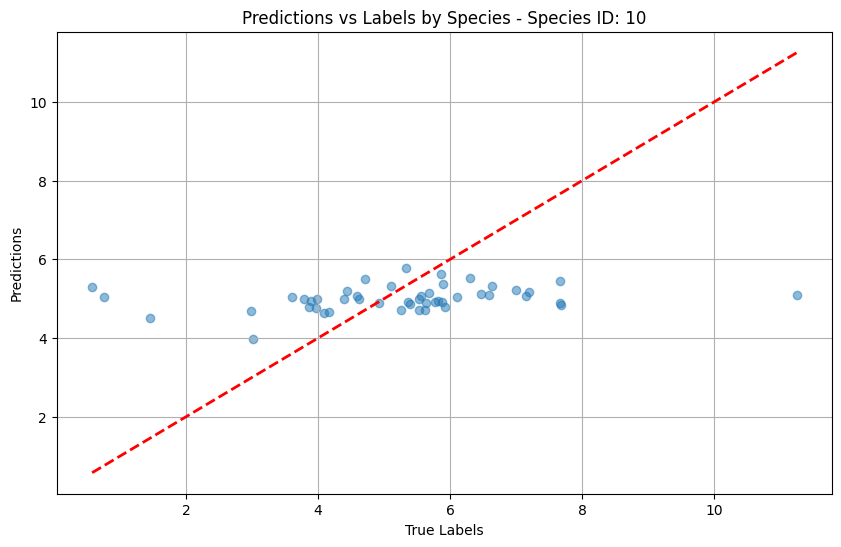

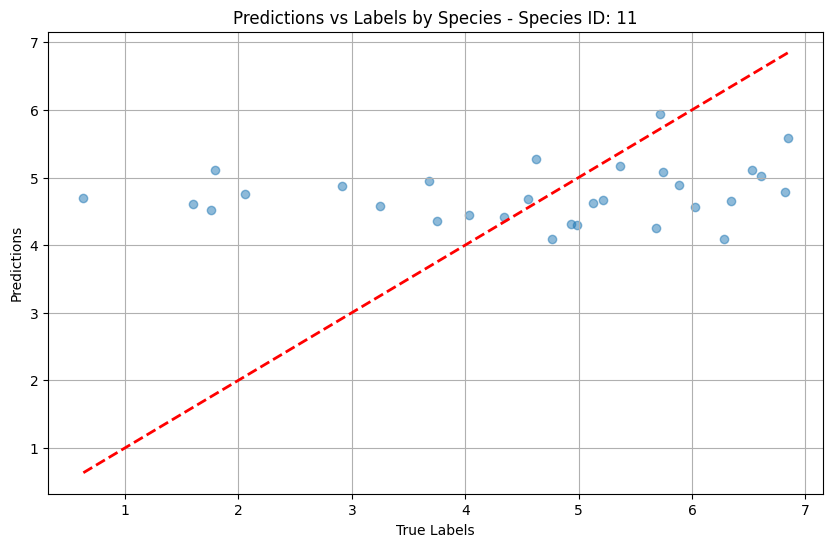

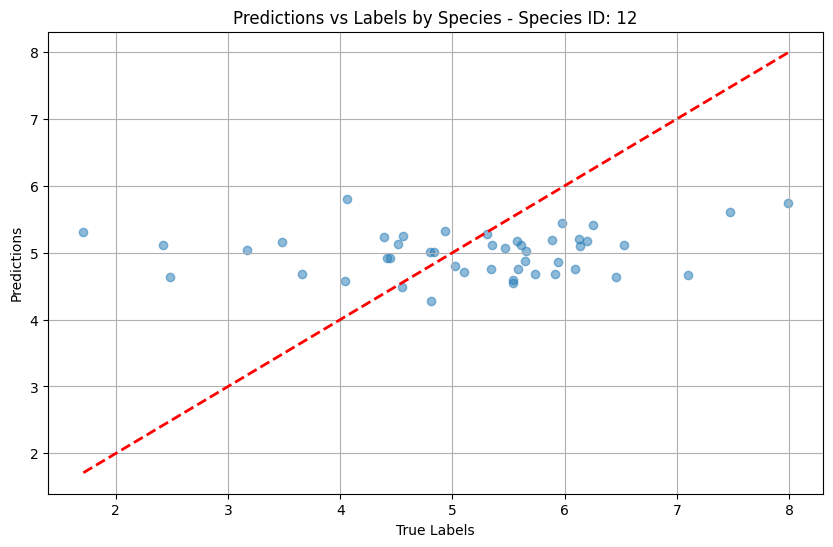

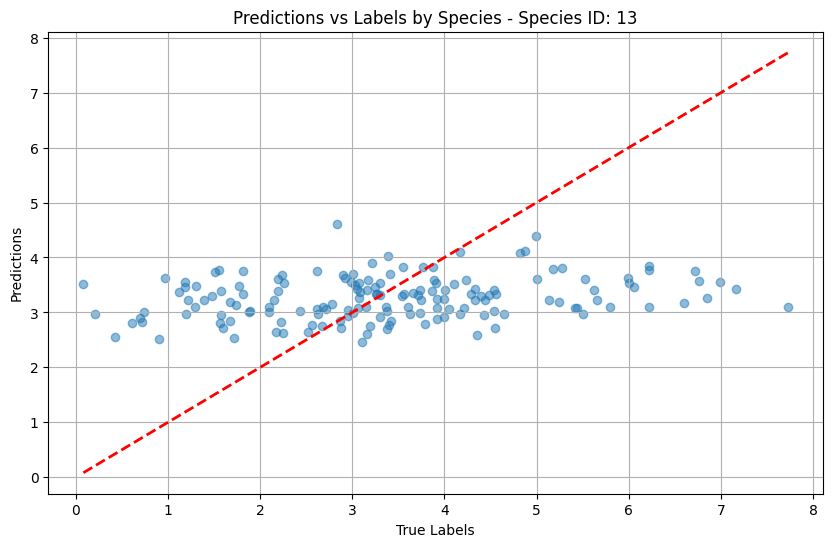

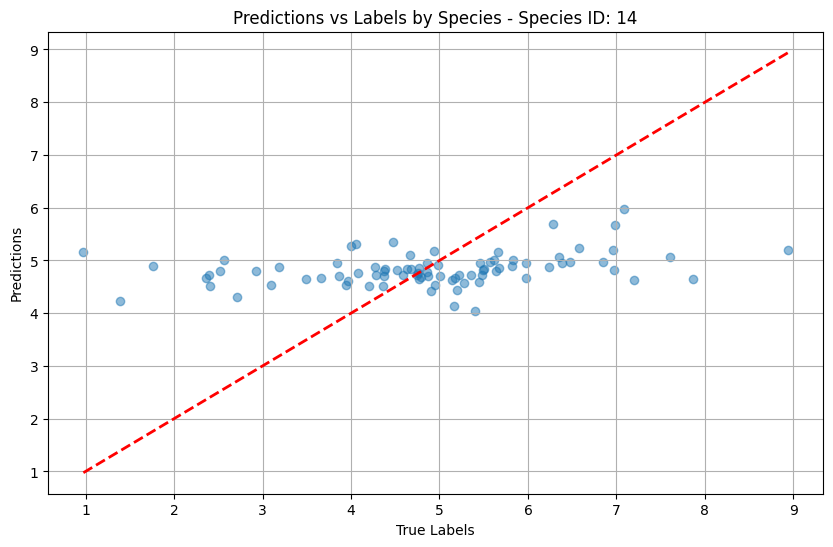

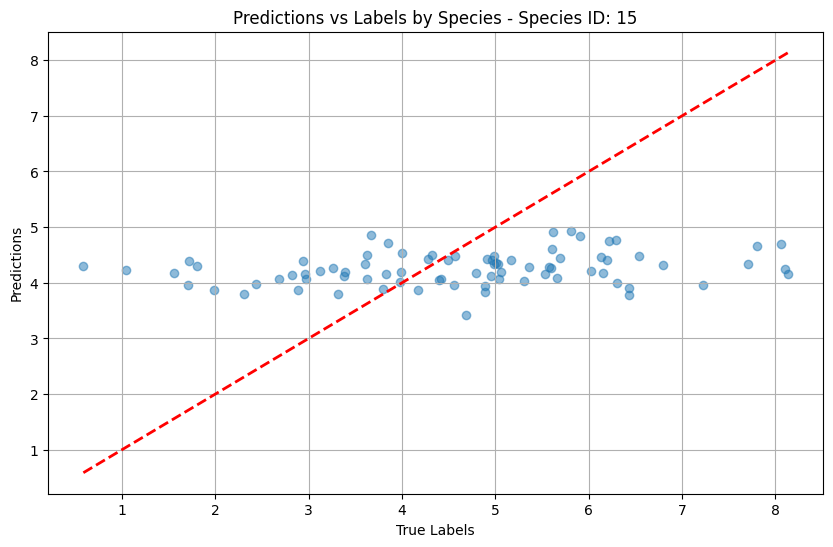

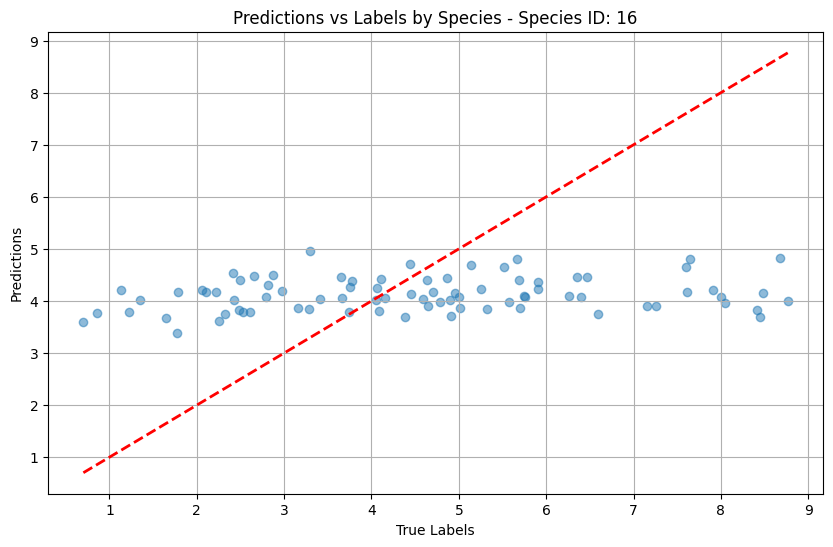

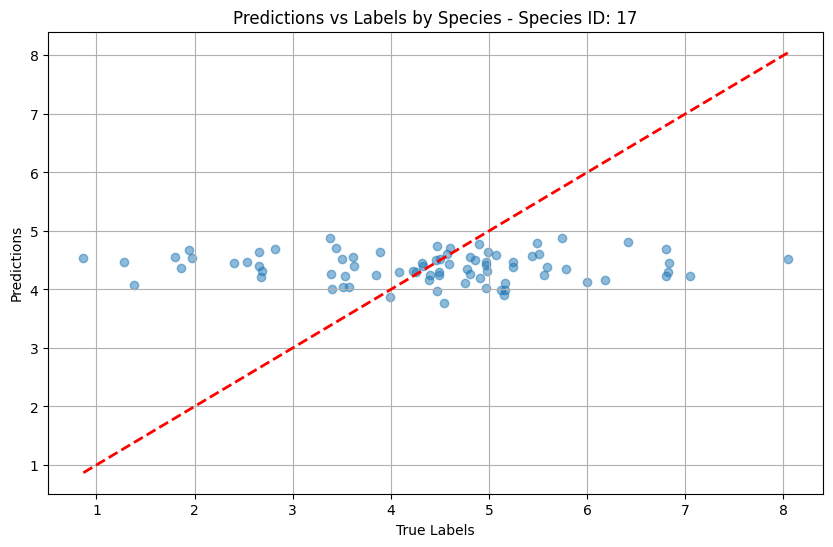

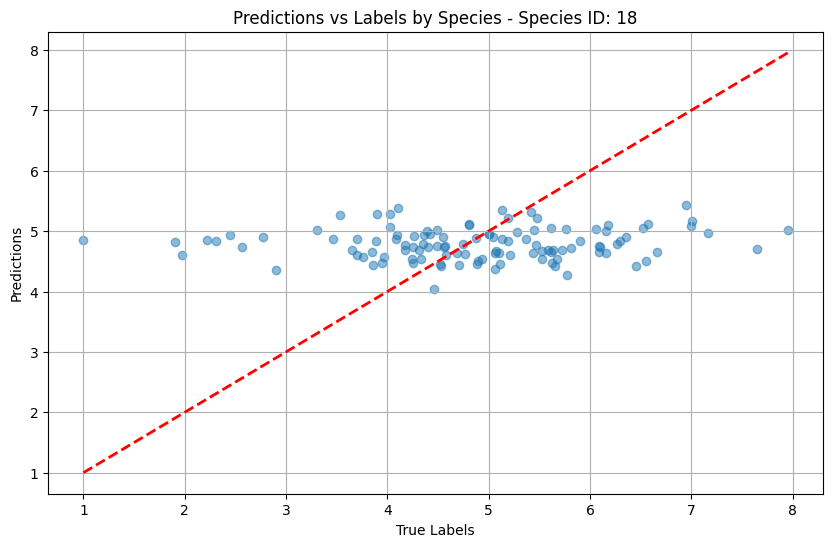

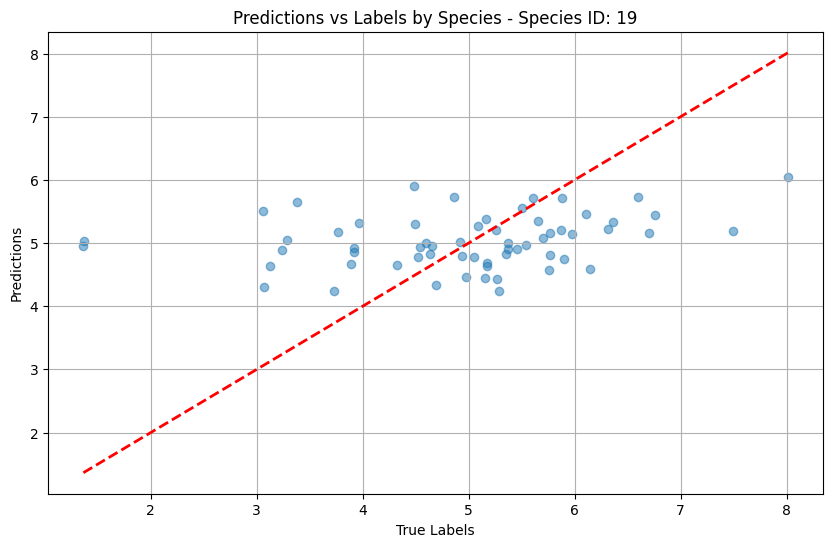

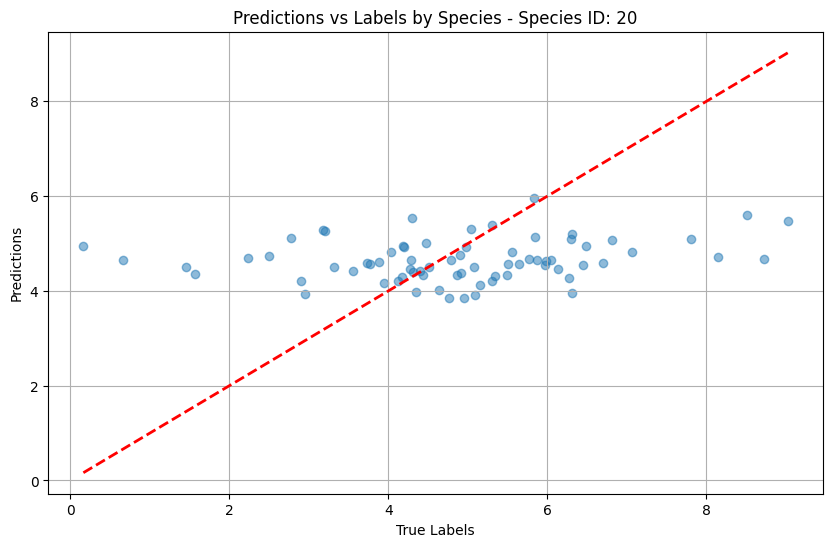

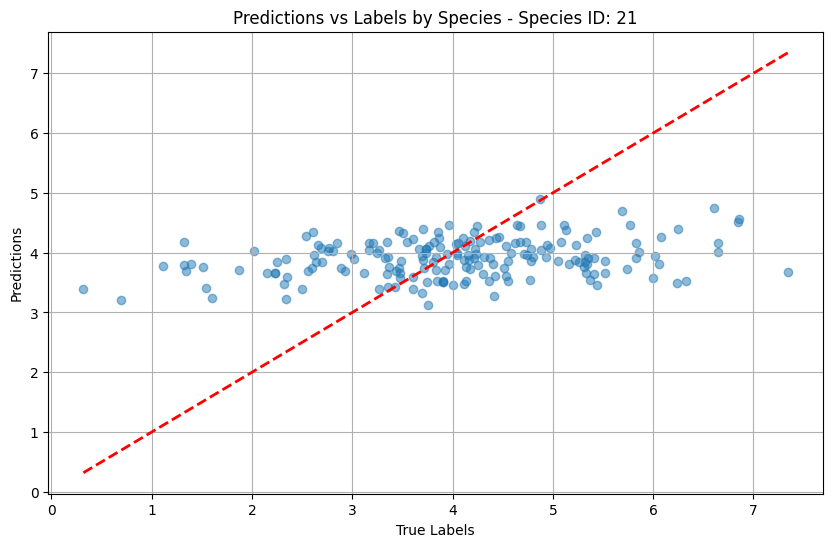

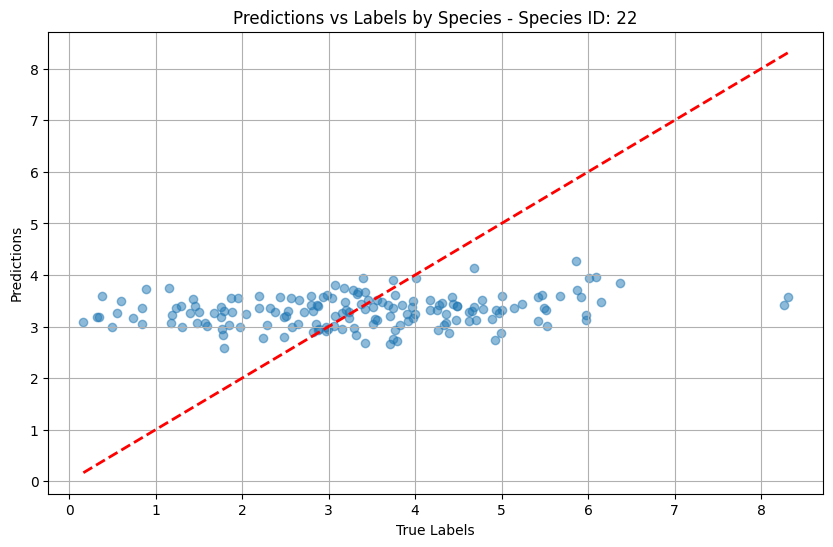

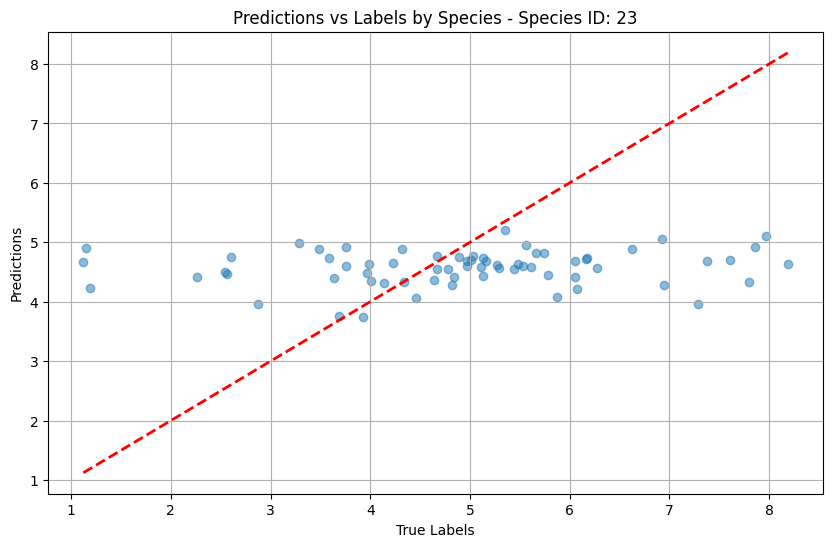

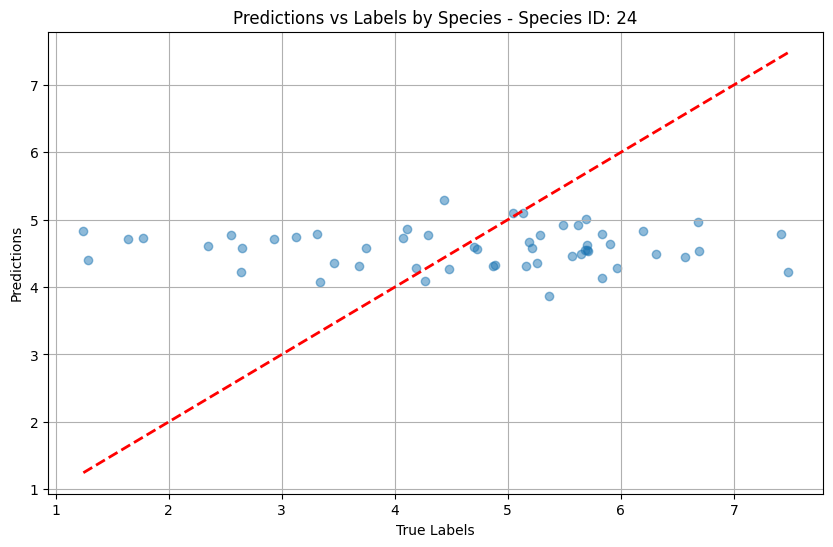

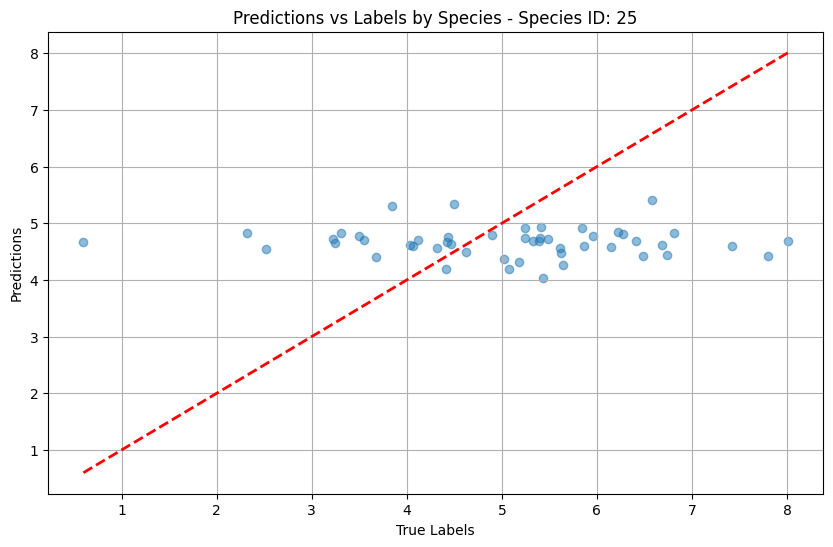

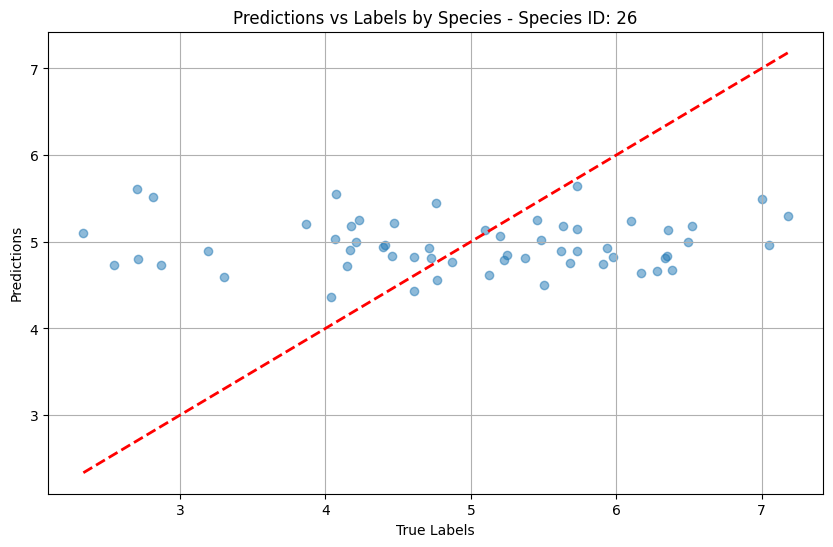

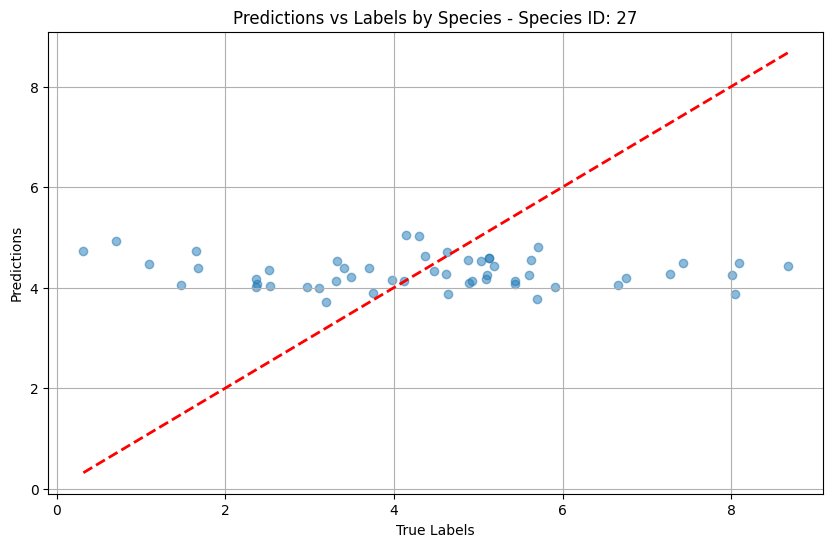

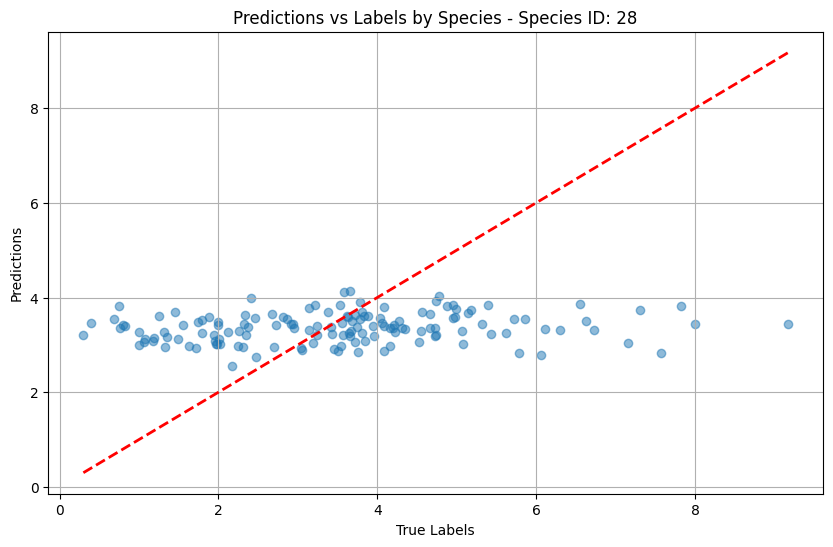

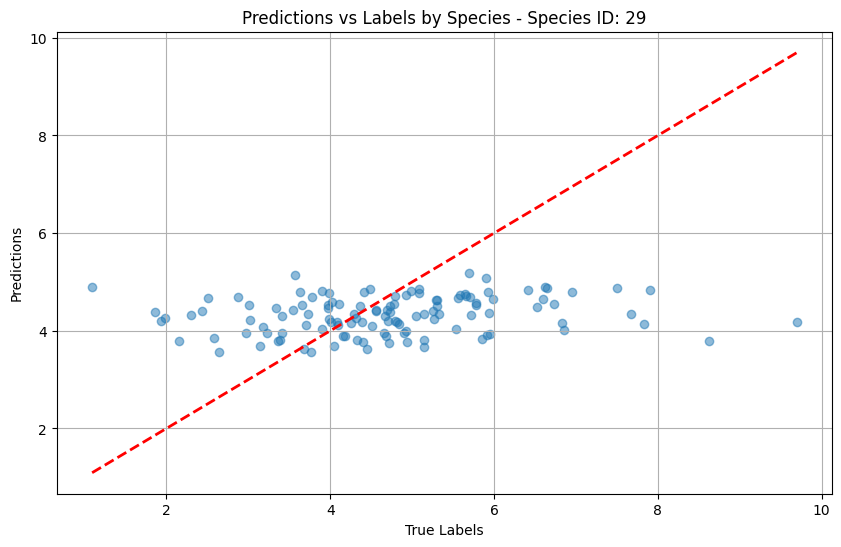

In [92]:
plot_predictions_vs_labels_by_species(predictions, labels, species_ids)


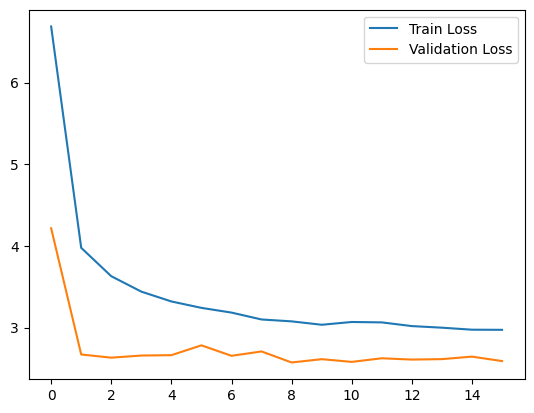

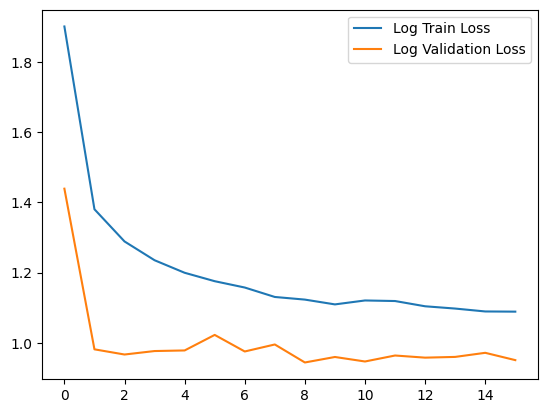

In [93]:
plot_losses(train_losses, val_losses)